# Installing dtws1

In [1]:
!pip uninstall dtws1 -y
!cd .. && make install

Found existing installation: dtws1 0.4.0
Uninstalling dtws1-0.4.0:
  Successfully uninstalled dtws1-0.4.0
rm -fr build/
rm -fr dist/
rm -fr .eggs/
find . -name '*.egg-info' -exec rm -fr {} +
find . -name '*.egg' -exec rm -f {} +
find . -name '*.pyc' -exec rm -f {} +
find . -name '*.pyo' -exec rm -f {} +
find . -name '*~' -exec rm -f {} +
find . -name '__pycache__' -exec rm -fr {} +
rm -fr .tox/
rm -f .coverage
rm -fr htmlcov/
rm -fr .pytest_cache
python setup.py install
running install
running bdist_egg
running egg_info
creating dtws1.egg-info
writing dtws1.egg-info/PKG-INFO
writing dependency_links to dtws1.egg-info/dependency_links.txt
writing requirements to dtws1.egg-info/requires.txt
writing top-level names to dtws1.egg-info/top_level.txt
writing manifest file 'dtws1.egg-info/SOURCES.txt'
reading manifest file 'dtws1.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'dtws1.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/e

# Importing Dependencies

In [2]:
from dtws1 import heatmap, colorutil
from h3 import h3
import numpy as np
import pandas as pd
import tilemapbase

/home/chen/work/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/chen/work/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/chen/work/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful o

# Initializing Database for Tilemapbase

In [3]:
tilemapbase.init(create=True)

# Initializing Sample Dataframe

In [4]:
hills_lat, hills_lng = 35.66687568, 139.74947495
ids = list(h3.k_ring(h3.geo_to_h3(hills_lat, hills_lng, 10), 10))
print(ids[:3])

['8a2f5aade027fff', '8a2f5aade327fff', '8a2f5aadeb8ffff']


In [5]:
lats = [h3.h3_to_geo(i)[0] for i in ids]
lngs = [h3.h3_to_geo(i)[1] for i in ids]
print(lats[0], lngs[0])

35.66809835739631 139.75920819809372


In [6]:
df = pd.DataFrame(dict(
    id = ids,
    lat = lats,
    lng = lngs
))
df["rand"] = np.random.randint(1,15,size=len(df)) ## Random numbers are here to exhibit different colors of grids
df.head()

id        lat         lng  rand
0  8a2f5aade027fff  35.668098  139.759208    11
1  8a2f5aade327fff  35.666482  139.752401    11
2  8a2f5aadeb8ffff  35.663186  139.755557     3
3  8a2f5aad8597fff  35.672179  139.744021     1
4  8a2f5aade647fff  35.675848  139.750951    13

# Implementing heatmap.draw

(<Figure size 2000x2000 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc34f7230f0>)

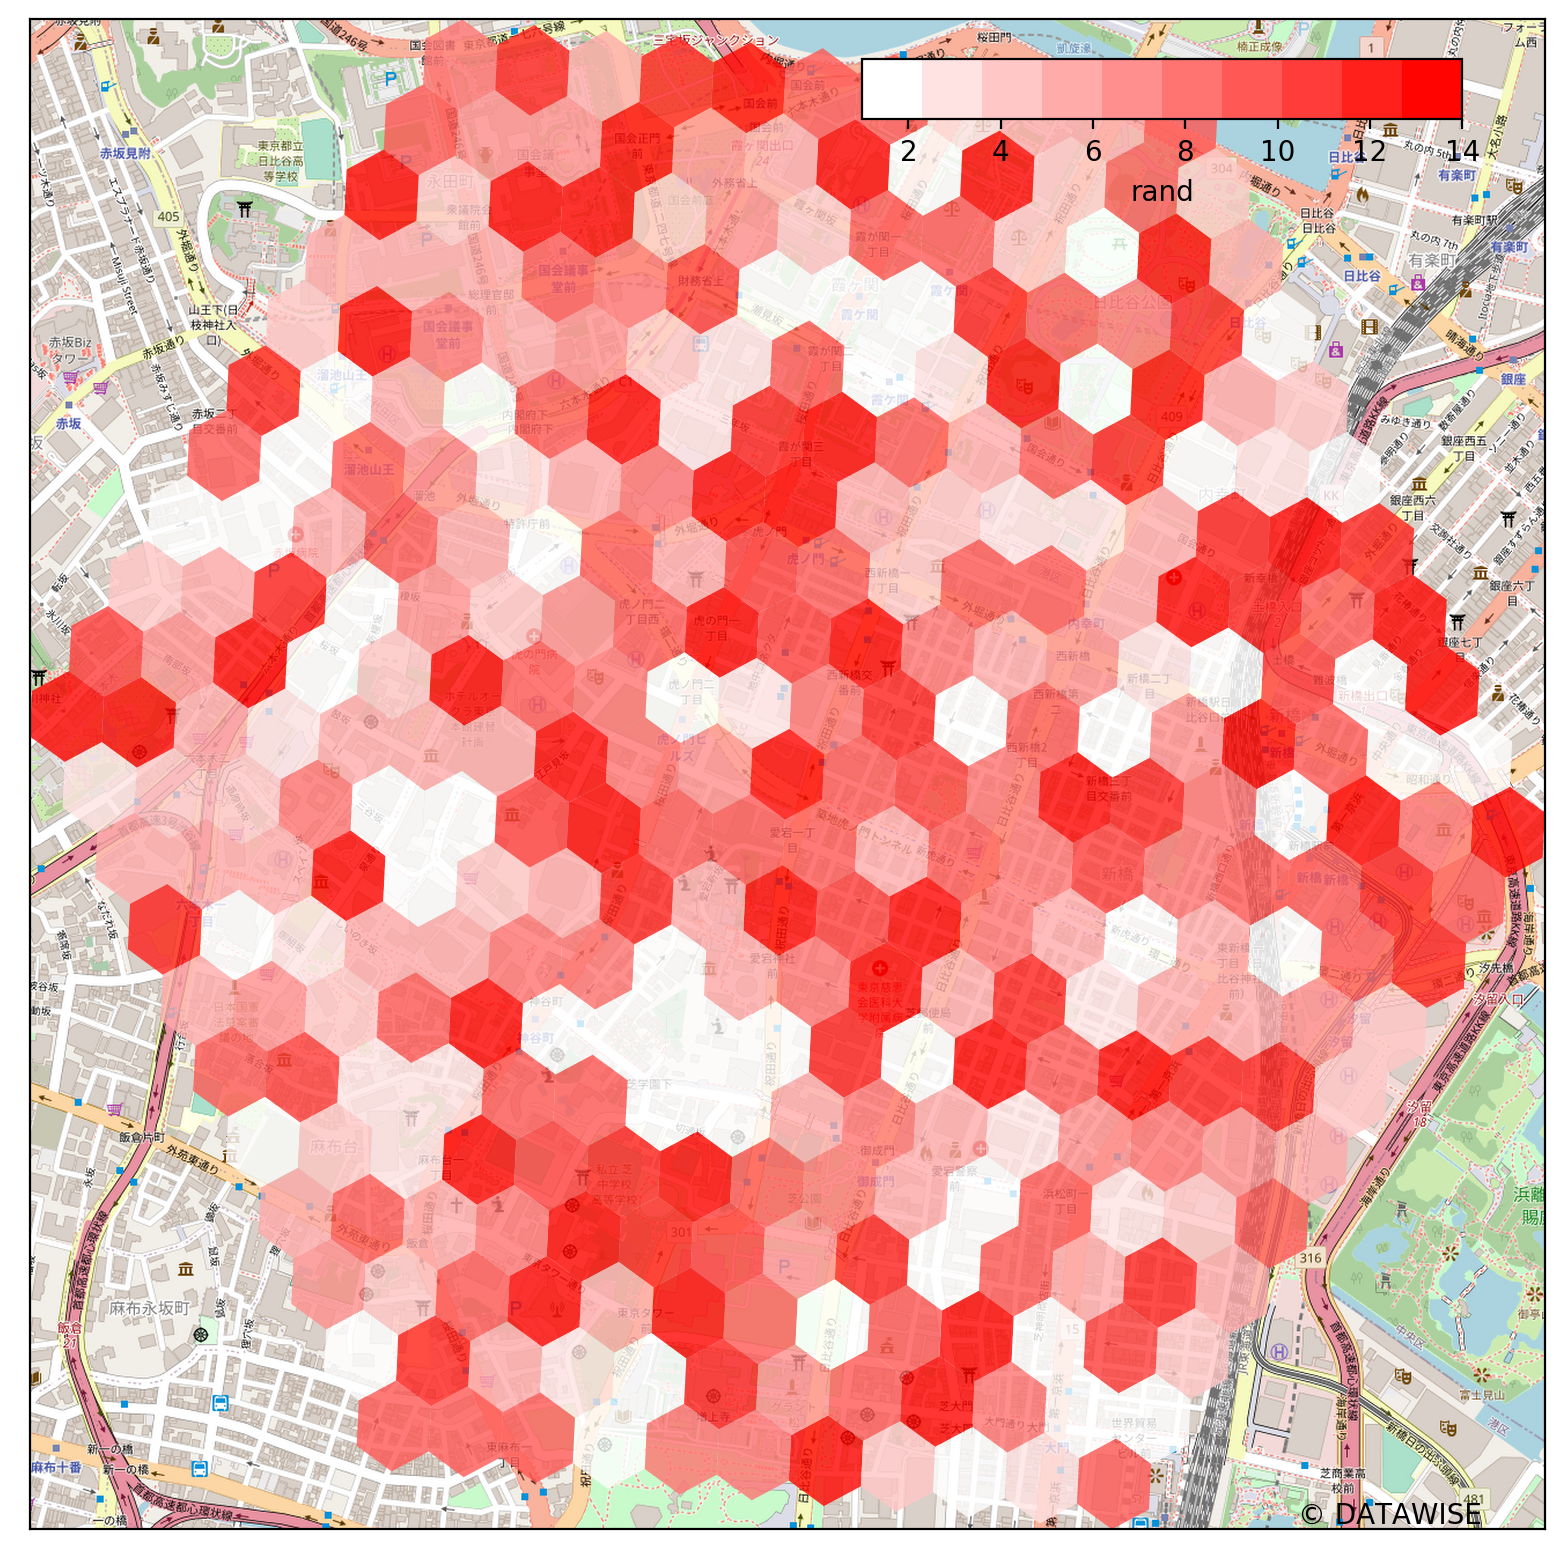

In [7]:
cs2 = colorutil.color_selector(values=df.rand, n=10) 

fmap1 = heatmap.draw(
    df=df, 
    id_col="id",
    val_col="rand", 
    extent=heatmap.extent(df["id"]),
    color_selector=cs2,
    figsize=(10,10),
    width=1000,
    dpi=200
)
fmap1

# Implementing heatmap.draw with Keyword Arguments

In [ ]:
cs2 = colorutil.color_selector_p(values=df.rand, n=10) 

fmap1 = heatmap.draw(
    df=df, 
    id_col="id",
    val_col="rand", 
    extent=heatmap.extent(df["id"]),
    color_selector=cs2,
    figsize=(10,10),
    width=1000,
    dpi=200,
    ## Following keywords are optional
    cbaxes_dimension=[0.66, 0.5, 0.03, 0.3], ## Changes the colorbar's position and dimension
    orientation='vertical' # Changes the orientation of the colorbar
)
fmap1